### Skin cancer

Skin cancers are cancers that arise from the skin. They are due to the development of abnormal cells that have the ability to invade or spread to other parts of the body.

[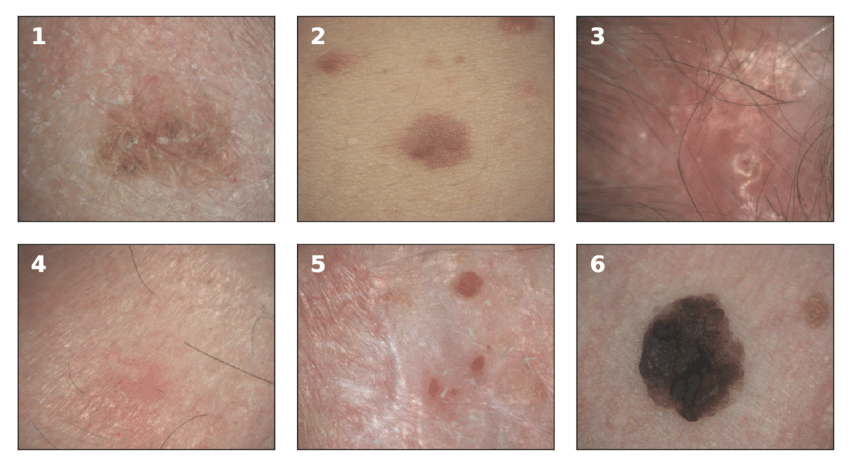](http://)











In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50 
#,NASNetLarge
from keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import warnings
warnings.filterwarnings("ignore")

#from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam ,RMSprop
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16

In [2]:
image_width, image_height = 224,224

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      shear_range=0.2,
      zoom_range=0.2,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255.)

train_generator = train_datagen.flow_from_directory(
                    "../input/skin-cencer-dataset-images/train",
                    batch_size=128,
                    class_mode='categorical',
                    shuffle=True,
                    target_size=(image_width, image_height)
)     

test_generator =  test_datagen.flow_from_directory(
                    "../input/skin-cencer-dataset-images/test",
                    batch_size=128,
                    class_mode='categorical',
                    shuffle=True,
                    target_size=(image_width, image_height)
)


Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [3]:
train_steps = train_generator.n // train_generator.batch_size

print(train_steps)

20


In [4]:
test_steps = test_generator.n // test_generator.batch_size

print(test_steps)

5


In [5]:
#rs = ResNet50(weights='imagenet', include_top=True, input_shape=(image_width, image_height, 3))

In [6]:
rs = ResNet50(include_top=True,
                 weights= None,
                 input_tensor=None,
                 input_shape=(image_width, image_height, 3),
                 pooling='avg',
                 classes=2)

In [7]:
for layers in (rs.layers):
    layers.trainable = False

In [8]:
rs.layers

In [9]:
model = Sequential()

# Add the ResNet50 convolutional base model
model.add(rs)

# Add new layers
model.add(Flatten())
model.add(Dense(4096 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096 , activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2)                 23591810  
_________________________________________________________________
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 4096)              12288     
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              1

In [10]:
lr = 1e-6
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr), metrics=['accuracy'])

In [11]:
mcp = ModelCheckpoint('modelResNe.h5', verbose=1)

In [12]:
es = EarlyStopping(patience=2,verbose=1)

In [13]:
history = model.fit(train_generator,steps_per_epoch=train_steps,epochs=30,validation_data=test_generator,validation_steps=test_steps,verbose=1,callbacks=[mcp,es])

Epoch 1/30
20/20 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.4775 
Epoch 00001: saving model to modelResNe.h5
20/20 [==============================] - 281s 14s/step - loss: 0.6939 - accuracy: 0.4775 - val_loss: 0.6933 - val_accuracy: 0.4516
Epoch 2/30
20/20 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5066 
Epoch 00002: saving model to modelResNe.h5
20/20 [==============================] - 280s 14s/step - loss: 0.6931 - accuracy: 0.5066 - val_loss: 0.6926 - val_accuracy: 0.5437
Epoch 3/30
20/20 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.5409 
Epoch 00003: saving model to modelResNe.h5
20/20 [==============================] - 282s 14s/step - loss: 0.6924 - accuracy: 0.5409 - val_loss: 0.6920 - val_accuracy: 0.5469
Epoch 4/30
20/20 [==============================] - ETA: 0s - loss: 0.6918 - accuracy: 0.5417 
Epoch 00004: saving model to modelResNe.h5
20/20 [==============================] - 281s 14s/step 

In [14]:
model.evaluate(test_generator, verbose=1, steps=test_steps)

5/5 [==============================] - 43s 9s/step - loss: 0.6901 - accuracy: 0.5469


[0.6900867223739624, 0.546875]

Text(0.5, 1.0, 'Training and validation loss')

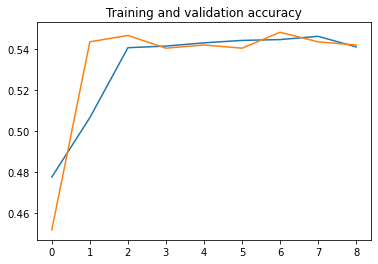

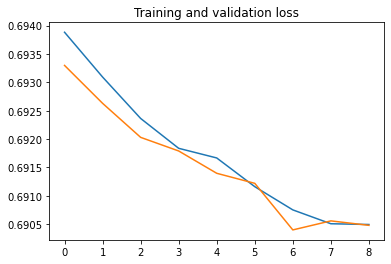

In [15]:
import matplotlib.pyplot as plt

accuracy      = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(accuracy))

plt.plot(epochs, accuracy)
plt.plot(epochs, val_accuracy)
plt.title('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [16]:
train_generator.class_indices

{'benign': 0, 'malignant': 1}

In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

image_width, image_height = 224,224

img = image.load_img('../input/skin-cencer-dataset-images/data/train/benign/1002.jpg', target_size=(image_width, image_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
img/= 255.
model = load_model('modelResNe.h5')
result = model.predict(img)
train_generator.class_indices
if result[0][0] == 0:
    prediction = 'Malignant'
else:
    prediction = 'Benign'
print(prediction)

Benign


In [18]:
prediction = model.predict_classes(img)
prediction

array([0])

In [19]:
model.save('modelResNe.h5')

In [20]:
vvg = VGG16(input_shape=(224,224, 3), include_top=False,weights = 'imagenet')

58892288/58889256 [==============================] - 0s 0us/step


In [21]:
vvg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [22]:
for layers in (vvg.layers):
    layers.trainable = False

In [23]:
model2 = Sequential()

# Add the vvg convolutional base model
model2.add(vvg)

# Add new layers
model2.add(Flatten())
model2.add(Dense(4096 , activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(4096 , activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(4096, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(2, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 4096)              102764544 
_________________________________________________________________
dropout_3 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_4 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 4096)             

In [24]:
#z = layers.Flatten()(pretrained_model.output)
 
#z  = layers.Dense(4096 , activation='relu')(z)
#z  = layers.Dense(4096 , activation='relu')(z)
 
   
#z = layers.Dense(2, activation='softmax')(z)

In [25]:
#model2 = Model(vvg.input, z)

In [26]:
#model2.summary()

In [27]:
lr = 1e-4
model2.compile(loss='categorical_crossentropy', optimizer=Adam(lr), metrics=['accuracy'])

In [28]:
mcp2 = ModelCheckpoint('modelVVG.h5', verbose=1)

In [29]:
es2 = EarlyStopping(patience=2,verbose=1)

In [30]:
#history = model.fit(train_generator,epochs=10,batch_size = 128)


In [31]:
history = model2.fit(train_generator,steps_per_epoch=train_steps,epochs=30,validation_data=test_generator,validation_steps=test_steps,verbose=1,callbacks=[mcp2,es2])

Epoch 1/30
20/20 [==============================] - ETA: 0s - loss: 1.0669 - accuracy: 0.5361 
Epoch 00001: saving model to modelVVG.h5
20/20 [==============================] - 847s 42s/step - loss: 1.0669 - accuracy: 0.5361 - val_loss: 0.6357 - val_accuracy: 0.5578
Epoch 2/30
20/20 [==============================] - ETA: 0s - loss: 0.5719 - accuracy: 0.7170 
Epoch 00002: saving model to modelVVG.h5
20/20 [==============================] - 849s 42s/step - loss: 0.5719 - accuracy: 0.7170 - val_loss: 0.4298 - val_accuracy: 0.8219
Epoch 3/30
20/20 [==============================] - ETA: 0s - loss: 0.4838 - accuracy: 0.7752 
Epoch 00003: saving model to modelVVG.h5
20/20 [==============================] - 869s 43s/step - loss: 0.4838 - accuracy: 0.7752 - val_loss: 0.4492 - val_accuracy: 0.8141
Epoch 4/30
20/20 [==============================] - ETA: 0s - loss: 0.4469 - accuracy: 0.7904 
Epoch 00004: saving model to modelVVG.h5
20/20 [==============================] - 846s 42s/step - loss: 

In [32]:
model2.evaluate(test_generator, verbose=1, steps=test_steps)

5/5 [==============================] - 139s 28s/step - loss: 0.3786 - accuracy: 0.8297


[0.37863650918006897, 0.8296874761581421]

Text(0.5, 1.0, 'Training and validation loss')

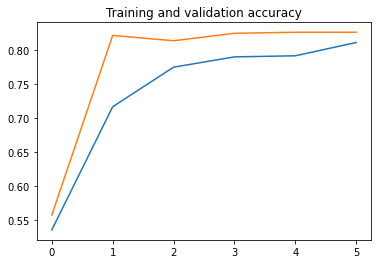

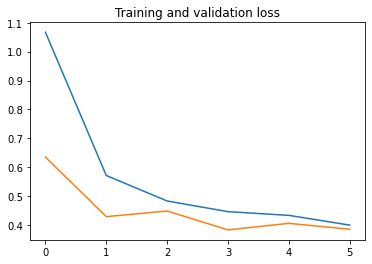

In [33]:
import matplotlib.pyplot as plt

accuracy      = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(accuracy))

plt.plot(epochs, accuracy)
plt.plot(epochs, val_accuracy)
plt.title('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [34]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

image_width, image_height = 224,224

img = image.load_img('../input/skin-cencer-dataset-images/test/malignant/1026.jpg', target_size=(image_width, image_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
img/= 255.
model = load_model('modelVVG.h5')
result = model.predict(img)
train_generator.class_indices
if result[0][0] == 0:
    prediction = 'Malignant'
else:
    prediction = 'Benign'
print(prediction)

Benign


In [35]:
model.save('modelVVG.h5')